
Running simulation for Pe = 5


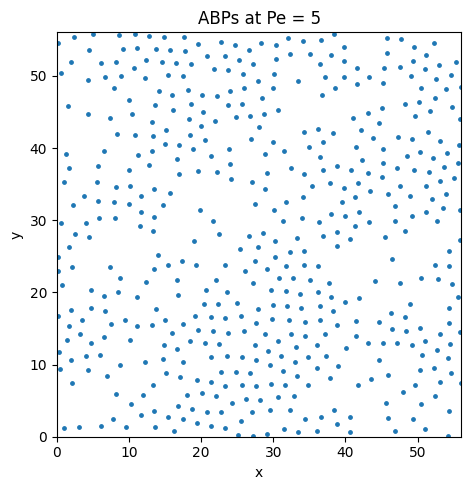


Running simulation for Pe = 10


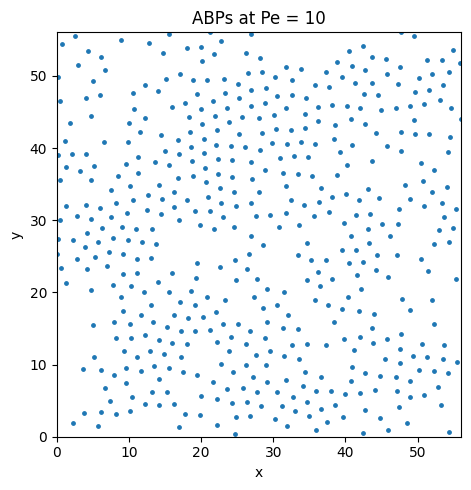


Running simulation for Pe = 20


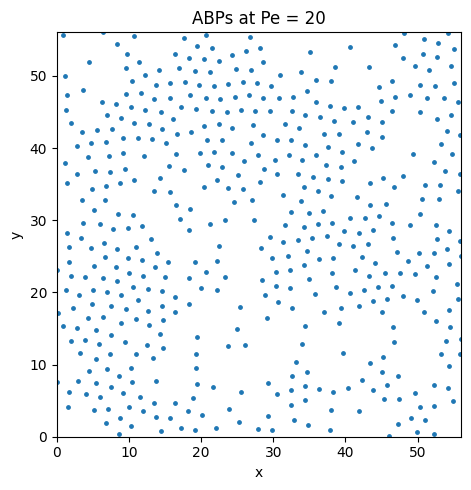


Running simulation for Pe = 40


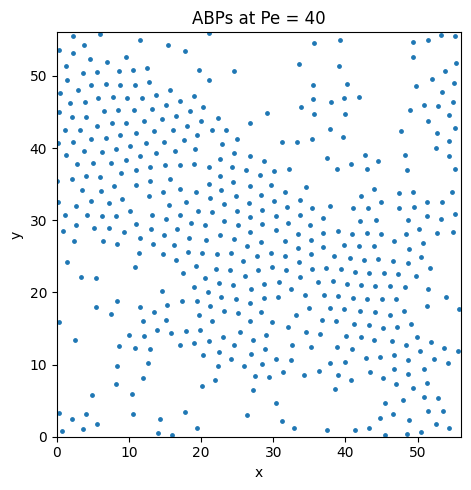


Running simulation for Pe = 80


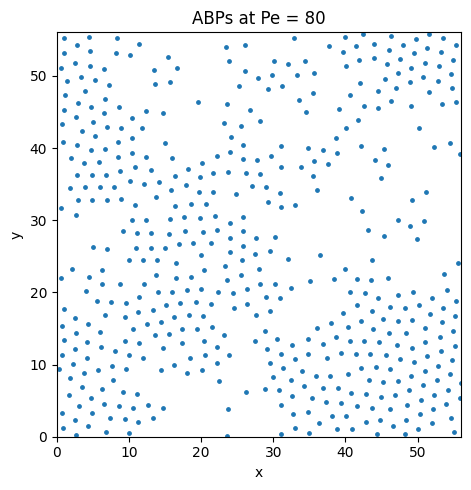


Running simulation for Pe = 120


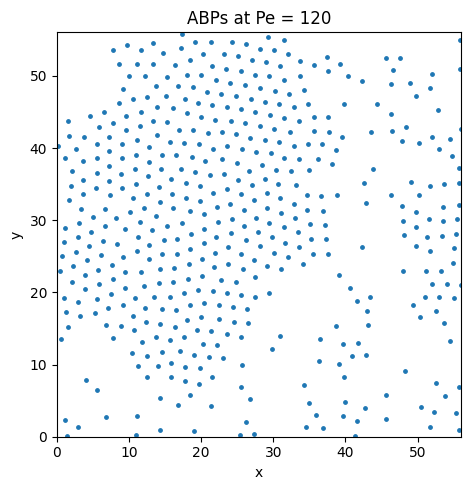

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import abp_sim


#simulation parameters
N = 500
radius = 1.0
phi = 0.5
dt = 0.01
steps = 20000
transient_steps = 5000

L = np.sqrt(N * np.pi * radius**2 / phi)

# Peclet numbers to scan
Pe_list = [5, 10, 20, 40, 80, 120]

for Pe in Pe_list:

    print(f"\nRunning simulation for Pe = {Pe}")

    #initialize random positions and orientations
    positions = np.random.rand(N, 2) * L
    thetas = 2 * np.pi * np.random.rand(N)

    
    # Create system
    system = abp_sim.System(N, L, Pe)
    system.initialize_particles(
        positions.tolist(),
        thetas.tolist()
    )

    particles = system.get_particles()
    evolver = abp_sim.Evolver(system)

    for _ in range(steps):
        evolver.step()

    pos = np.array([p.position for p in particles])

    
    # Snapshot plot of final configuration
    plt.figure(figsize=(5, 5))
    plt.scatter(pos[:, 0], pos[:, 1], s=6)
    plt.title(f"ABPs at Pe = {Pe}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, L)
    plt.ylim(0, L)
    plt.gca().set_aspect("equal")
    plt.tight_layout()
    plt.show()

